# Assignment 4: Permutation test 1
## Learning Outcomes
By completing this assignment, you will be able to implement and use randomization tests to determine whether a specific effect is statistically significant. Randomization tests are a highly universal and powerful way to do this, and form an essential part of the toolkit of any Data Scientist. 

## Problem Description
An increasingly common statistical tool for determining whether a difference is significant is the randomization or permutation test. A randomization test builds - rather than assumes – a sampling distribution of the test statistics. This is achieved by exchanging or permuting variables which are “exchangeable” under the Null-hypothesis. A randomization test gives a simple way to compute the sampling distribution for any test statistic under the null hypothesis that the dependent variable is statistically not dependent on the shuffled variable. 
In this assignment, we continue with the income dataset from week 1 and 2. This week your main task is to determine whether the difference in proportion for female vs. male directors to direct action movies is significant. 
You are allowed to use standard numpy and pandas functions such as mean, groupby, shuffle. But you are not allowed to use a permutation functions that have been already been designed. Numeric calculations in python that are printed should be rounded to 6 decimal places. 

Methods that you may find beneficial. 
Pandas: crosstab, iloc. Numpy: random.shuffle, reset_index, matplotlib: hist, axvline 

## Tbe dataset 
As a data scientist for a Hollywood law firm, your task is to provide evidence for the claim there is gender discrimination on the movie industry. You are provided with a summary of the last 250 movies, and the gender and income of the director. The dataset also includes a number of other variables
- North American box office revenue (boxoff)
- Production cost of the movie (prodcost)
- Income of the director (dirIncome in millions)
- Gender of the director (dirGender) 
- Year of release (year)
- Month of release (month) 
- Movie genre (genre): Action, Comedy 
- Number of theatres (numTheatrs)


## Preliminaries 
Import pandas, numpy, matplotlib, and load the dataset file

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats


df = pd.read_csv('movieDataset.csv')
df

,boxoff,prodcost,dirIncome,dirGender,year,month,genre,numTheatres
0,88.648583,44.742936,1.143234,male,2012,3,comedy,139
1,145.334924,38.835516,3.393535,female,2014,11,drama,213
2,238.265684,29.532283,2.418883,male,2015,6,other,100
3,212.714742,157.111899,2.034115,male,2014,10,adventure,436
4,120.175461,30.547155,0.963219,female,2012,1,comedy,115
...,...,...,...,...,...,...,...,...
245,187.231562,72.743712,3.105438,male,2012,12,adventure,366
246,215.713195,136.851707,1.917771,male,2013,7,adventure,285
247,166.827002,50.684470,2.414571,male,2014,1,other,233
248,223.226998,40.103513,2.176928,male,2015,2,drama,489


## TASK 1: Defining the test statistics (40pts)
### Question 1.1  - Explore the gender imbalance across movie genres (10pts)
As you did in Assignment 02, create a table that displays the number of movies per genre and director gender. Make a stacked barplot that best let's you see what proprtion of directors were female for each movie genre.   Remember x-, y-axis labels and caption. Written answer: Which movie genre has the highest proportion of female directors? 

*Hint: Since this is a new dataset for you, it is excellent practice to explore the dataset as you did in Assignment number 2*

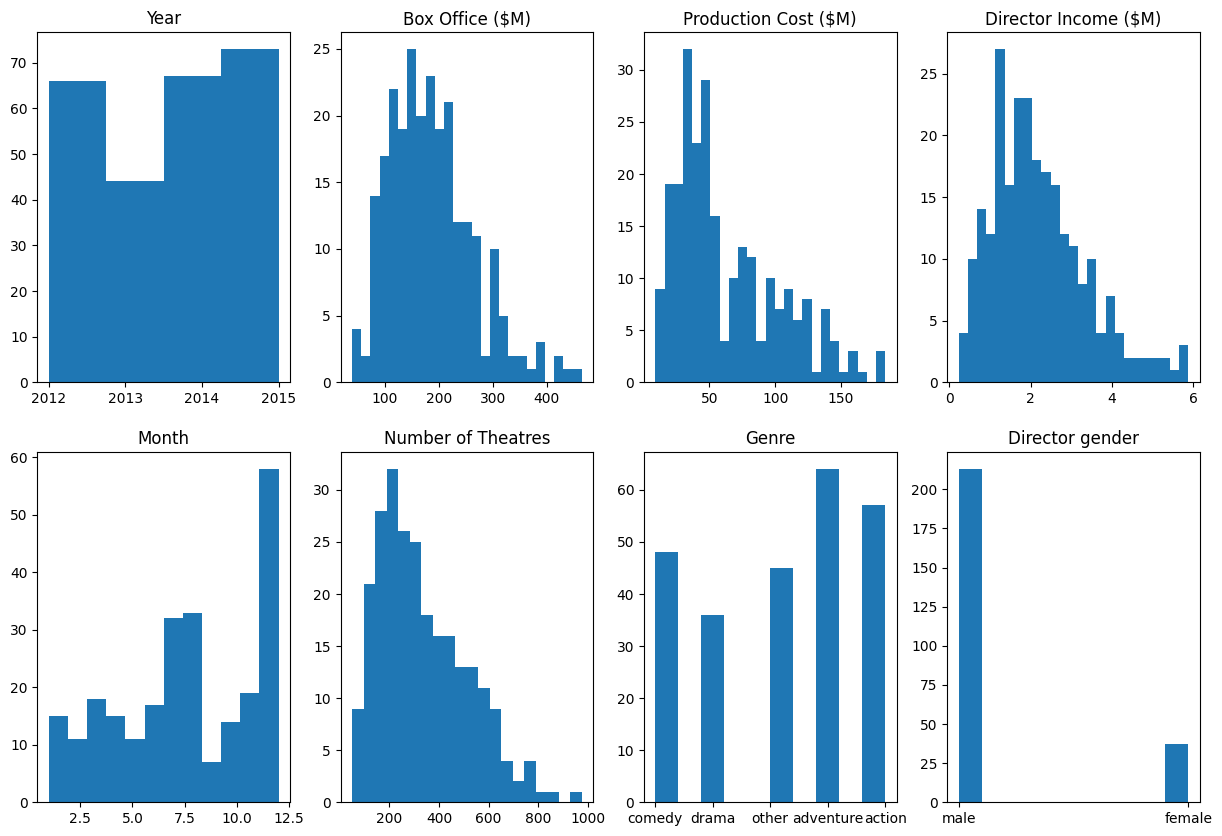

In [49]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# year
axes[0, 0].hist(df['year'], bins=4)
axes[0, 0].set_title('Year')

# box office
axes[0, 1].hist(df['boxoff'], bins=25)
axes[0, 1].set_title('Box Office ($M)')

# production cost
axes[0, 2].hist(df['prodcost'], bins=25)
axes[0, 2].set_title('Production Cost ($M)')

# director income
axes[0, 3].hist(df['dirIncome'], bins=25)
axes[0, 3].set_title('Director Income ($M)')

# month
axes[1, 0].hist(df['month'], bins=12)
axes[1, 0].set_title('Month')

# num theatres
axes[1, 1].hist(df['numTheatres'], bins=20)
axes[1, 1].set_title('Number of Theatres')

# genre
axes[1, 2].hist(df['genre'])
axes[1, 2].set_title('Genre')

# gender
axes[1, 3].hist(df['dirGender'])
axes[1, 3].set_title('Director gender')

plt.show()

Text(0, 0.5, 'Genre')

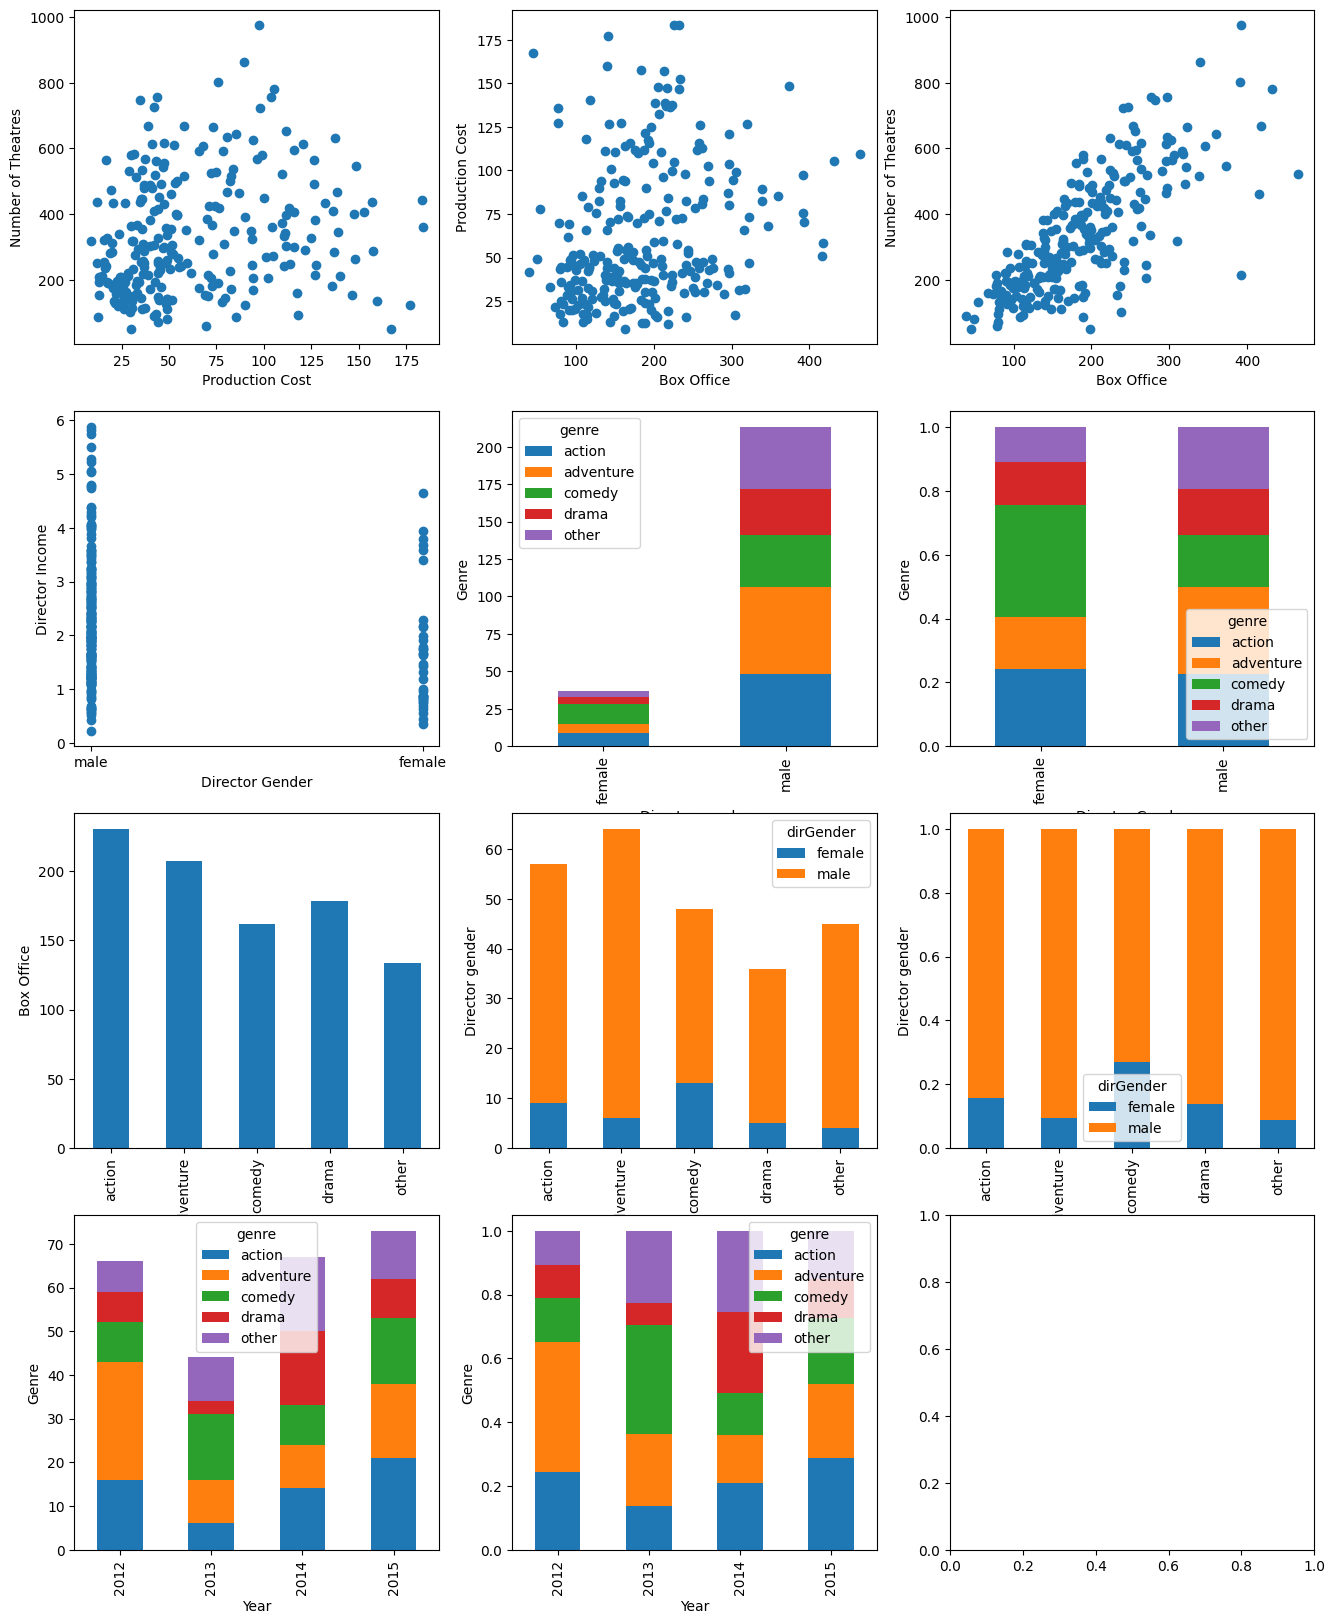

In [50]:
fig, axes = plt.subplots(4, 3, figsize=(16, 20))

# prodcost vs num theatres
axes[0, 0].scatter(df['prodcost'], df['numTheatres'])
axes[0, 0].set_xlabel('Production Cost')
axes[0, 0].set_ylabel('Number of Theatres')

# boxoff vs prodcost
axes[0, 1].scatter(df['boxoff'], df['prodcost'])
axes[0, 1].set_xlabel('Box Office')
axes[0, 1].set_ylabel('Production Cost')

# boxoff vs num theatres
axes[0, 2].scatter(df['boxoff'], df['numTheatres'])
axes[0, 2].set_xlabel('Box Office')
axes[0, 2].set_ylabel('Number of Theatres')

# dir gender vs dir income
axes[1, 0].scatter(df['dirGender'], df['dirIncome'])
axes[1, 0].set_xlabel('Director Gender')
axes[1, 0].set_ylabel('Director Income')

# dir gender vs genre
pd.crosstab(df['dirGender'], df['genre']).plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_xlabel('Director gender')
axes[1, 1].set_ylabel('Genre')

# dir gender vs genre normalized
pd.crosstab(df['dirGender'], df['genre'], normalize='index').plot(kind='bar', stacked=True, ax=axes[1, 2])
axes[1, 2].set_xlabel('Director Gender')
axes[1, 2].set_ylabel('Genre')

# genre vs dir gender
pd.crosstab(df['genre'], df['dirGender']).plot(kind='bar', stacked=True, ax=axes[2, 1])
axes[2, 1].set_xlabel('Genre')
axes[2, 1].set_ylabel('Director gender')

# genre vs dir gender normalized
pd.crosstab(df['genre'], df['dirGender'], normalize='index').plot(kind='bar', stacked=True, ax=axes[2, 2])
axes[2, 2].set_xlabel('Genre')
axes[2, 2].set_ylabel('Director gender')

# genre vs boxoff
df.boxoff.groupby(df.genre).mean().plot(kind='bar', ax=axes[2, 0])
axes[2, 0].set_xlabel('Genre') 
axes[2, 0].set_ylabel('Box Office')

# year vs genre
pd.crosstab(df['year'], df['genre']).plot(kind='bar', stacked=True, ax=axes[3, 0])
axes[3, 0].set_xlabel('Year')
axes[3, 0].set_ylabel('Genre')

# year vs genre normalized
pd.crosstab(df['year'], df['genre'], normalize='index').plot(kind='bar', stacked=True, ax=axes[3, 1])
axes[3, 1].set_xlabel('Year')
axes[3, 1].set_ylabel('Genre')


### Question 1.2 - Create contingency table of comedy (yes/no) by director gender (5pts)
Generate and display a cross-tabulation table of the 2x2 proportions of directorGender vs. whether the movie is a comedy or not (all other genres should be combined into non-comedy movies).  

In [51]:
df['isComedy'] = df['genre'] == 'comedy'
comedy_gender_ct = pd.crosstab(df['dirGender'], df['isComedy'])
comedy_gender_ct

isComedy,False,True
dirGender,,
female,24,13
male,178,35


### Question 1.3 - Calculate p(comedy|female)-p(comedy|male) (15pts)
Calculate and report the probability that the movie is a comedy given that the director Gender is female, p(comedy|female), the probability of the movie is a comedy given that the director Gender is male, p(comedy|male), as well as the difference between these two numbers, p(comedy|female)- p(comedy|male) (for help, see solution to homework 2).

In [52]:
p_comedy_female = df['isComedy'][df['dirGender'] == 'female'].mean()
print('P(comedy|female) =', p_comedy_female)

P(comedy|female) = 0.35135135135135137


In [54]:
p_comedy_male = df['isComedy'][df['dirGender'] == 'male'].mean()
print('P(comedy|male) =', p_comedy_male)

P(comedy|male) = 0.1643192488262911


In [55]:
p_cf_cm = p_comedy_female - p_comedy_male
print('P(comedy|female) - P(comedy|male) =', p_cf_cm)

P(comedy|female) - P(comedy|male) = 0.18703210252506028


### Question 1.4 - Define a function that calculates this difference in probability (10pts)
Write a function (e.g., https://www.tutorialspoint.com/python/python_functions.htm) that takes the data frame as an input and returns the difference on conditional probabilities (as calculated in question 2). 
Test the function by calling it with your data and report the difference in probability. 
This difference is your test statistics for the coming permutation test.

In [67]:
# Provide the function here
def calculate_conditional_probability_difference(df):
    p_comedy_female = df['isComedy'][df['dirGender'] == 'female'].mean()
    p_comedy_male = df['isComedy'][df['dirGender'] == 'male'].mean()
    return p_comedy_female - p_comedy_male


In [57]:
# Execute the function with you data
calculate_conditional_probability_difference(df)

0.18703210252506028

## Task 2: Perform a permutation test (60pts)
### Question 2.1 (10pts)
Written answer: We want to test the hypothesis that female directors are more likely than male directors to conduct a comedy. Under this hypothesis the p(comedy|female) should be higher than p(comedy|male). What is the Null-hypothesis we need to consider? 

We need to consider the opposite of this claim, which is that male directors are more likely (or equally likely) to conduct a comedy.

### Question 2.2 (40pts)
Perform a permutation test. Under the Null-hypothesis the director gender is exchangeable. 

First, write a function that takes a data frame as an input, and then randomly permutes a specific column of that that data frame (see lab for hints). The function should then return a modified copy of the dataframe.

Then write a function ``permutation_test`` that takes a data frame as an input and the loops ``numIter`` times. Every iteration of the  the loop it should shuffle the dirGender column of the data and then calls the function written for Question 1.4 to get the test statistic. Each iteration, the test statistic should  be stored in a list.  

After building up the numpy array of test statistics, the function should plot a histogram of the test statistics and mark the value of the empirical test statistics by a vertical line (see https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axvline.html). Finally, it should report the p-value. 

For Pseudo code see lecture. Start with 500 iterations to test your code – for the final result, use 5000 iterations.

In [121]:
# Write a function that shuffels the column of one data frame
def shuffle_col(df, col, seed=42):
    df_copy = df.copy()
    df_copy[col] = np.random.permutation(df_copy[col])
    return df_copy

# Write the function for the permutation test
def permutation_test(df, col, numIter):
    empirical = calculate_conditional_probability_difference(df)
    simulated = [calculate_conditional_probability_difference(shuffle_col(df, col)) for _ in range(numIter)]

    plt.hist(simulated, bins=30)
    plt.axvline(empirical, color='r', linestyle='dashed', linewidth=2)

    return np.mean(simulated >= empirical)


0.009

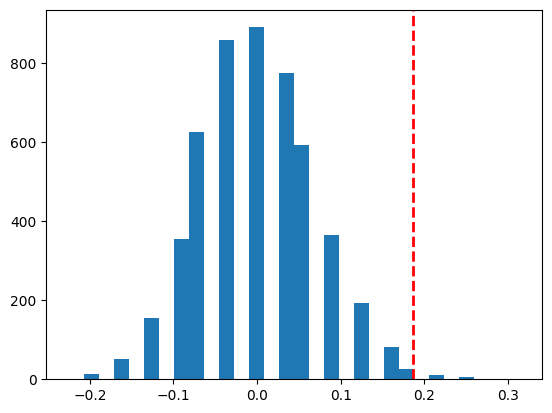

In [127]:
# Call the permutation test with your data 
permutation_test(df, 'dirGender', 5000)

# shuffles = {}
# for _ in range(10000):
#     shuffled = shuffle_col(df, 'dirGender')
#     ct = pd.crosstab(shuffled['dirGender'], df['isComedy'])
#     entry = (ct.loc['female', True], ct.loc['female', False], ct.loc['male', True], ct.loc['male', False])
#     shuffles[entry] = shuffles.get(entry, 0) + 1
# 
# shuffles

## Question 2.3 (10pts)
Written response: What do you conclude from this result?


The p-value obtained is 0.009, which suggests that under the null hypothesis, we only have a 0.9% chance of observing a difference in conditional probability as calculated from the emprical dataset. Which suggests that we have sufficient evidence to reject the null hypothesis, which is to say that, based on our observations, female directors are more likely than male directors to direct a comedy movie.